In [1]:
!pip install torchinfo

Import Libraries

In [10]:
import time
import os
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
import cv2
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from torchinfo import summary
import torchvision.models as models
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import OrderedDict
import platform
import psutil
import random
import glob
from tqdm import tqdm
from PIL import Image
from torchvision import transforms
from torchvision.transforms import ColorJitter, RandomRotation, RandomResizedCrop
from torchvision.transforms.functional import gaussian_blur
from PIL import ImageOps
from tabulate import tabulate

Configuration

In [6]:
cpu_info = platform.processor()

ram_info = psutil.virtual_memory()
total_ram_gb = ram_info.total / (1024 ** 3)

try:
    gpu_info = !nvidia-smi --query-gpu=gpu_name --format=csv
    gpu_name = gpu_info[1]
except:
    gpu_name = "No GPU available"

print("CPU:", cpu_info)
print("Total RAM (GB):", round(total_ram_gb, 2))
print("GPU:", gpu_name)

CPU: x86_64
Total RAM (GB): 31.35
GPU: No GPU available


Seed Value

In [8]:
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

Loading Dataset

In [11]:
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")
print("Path to dataset files:", path)

data_dir = os.path.join(path, "color")

file_paths = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):  
        for image_name in os.listdir(class_dir):
            file_paths.append(os.path.join(class_dir, image_name))
            labels.append(class_name)

df = pd.DataFrame({"file_path": file_paths, "label": labels})

df = df.sample(frac=1).reset_index(drop=True)

print(df.head())
print("Total images:", len(df))
print("Classes:", df['label'].unique())


Path to dataset files: /kaggle/input/plantvillage-dataset
                                           file_path  \
0  /kaggle/input/plantvillage-dataset/color/Straw...   
1  /kaggle/input/plantvillage-dataset/color/Potat...   
2  /kaggle/input/plantvillage-dataset/color/Grape...   
3  /kaggle/input/plantvillage-dataset/color/Soybe...   
4  /kaggle/input/plantvillage-dataset/color/Apple...   

                          label  
0      Strawberry___Leaf_scorch  
1          Potato___Late_blight  
2  Grape___Esca_(Black_Measles)  
3             Soybean___healthy  
4      Apple___Cedar_apple_rust  
Total images: 54305
Classes: ['Strawberry___Leaf_scorch' 'Potato___Late_blight'
 'Grape___Esca_(Black_Measles)' 'Soybean___healthy'
 'Apple___Cedar_apple_rust' 'Cherry_(including_sour)___healthy'
 'Orange___Haunglongbing_(Citrus_greening)'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Squash___Powdery_mildew'
 'Apple___Apple_scab' 'Blueberry___healthy' 

Class: Orange___Haunglongbing_(Citrus_greening), Count: 5507
Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Count: 5357
Class: Soybean___healthy, Count: 5090
Class: Peach___Bacterial_spot, Count: 2297
Class: Tomato___Bacterial_spot, Count: 2127
Class: Tomato___Late_blight, Count: 1909
Class: Squash___Powdery_mildew, Count: 1835
Class: Tomato___Septoria_leaf_spot, Count: 1771
Class: Tomato___Spider_mites Two-spotted_spider_mite, Count: 1676
Class: Apple___healthy, Count: 1645
Class: Tomato___healthy, Count: 1591
Class: Blueberry___healthy, Count: 1502
Class: Pepper,_bell___healthy, Count: 1478
Class: Tomato___Target_Spot, Count: 1404
Class: Grape___Esca_(Black_Measles), Count: 1383
Class: Corn_(maize)___Common_rust_, Count: 1192
Class: Grape___Black_rot, Count: 1180
Class: Corn_(maize)___healthy, Count: 1162
Class: Strawberry___Leaf_scorch, Count: 1109
Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Count: 1076
Class: Cherry_(including_sour)___Powdery_mildew, Count: 1052
Class: Potat

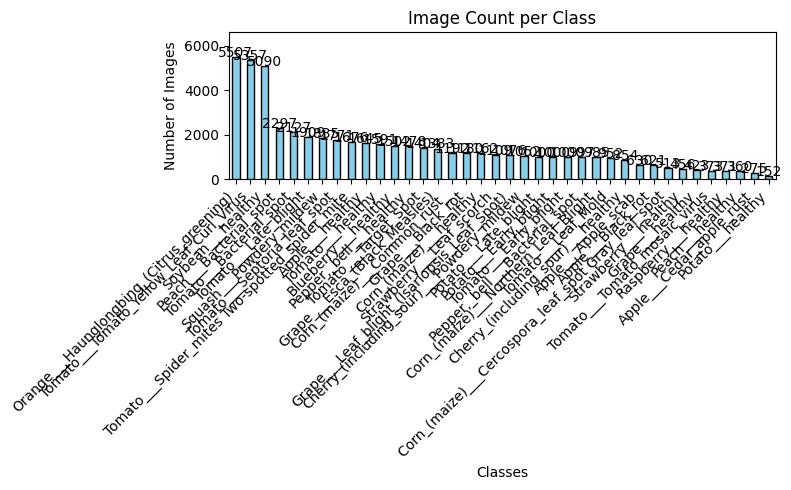

In [12]:
import matplotlib.pyplot as plt

class_counts = df['label'].value_counts()

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

plt.figure(figsize=(8, 5))
ax = class_counts.plot(kind='bar', color="skyblue", edgecolor="black")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(class_counts):
    ax.text(i, count + 5, str(count), ha='center')

plt.ylim(0, max(class_counts) * 1.2)
plt.tight_layout()
plt.show()
